In [ ]:
import numpy as np

In [ ]:
import torch

In [ ]:
from __future__ import print_function
import argparse
import numpy  as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms

In [ ]:
import data_loaders

In [ ]:
from data_loaders import Plain_Dataset, eval_data_dataloader

In [ ]:
from Region_Based_Attention import RegionBasedAttentionCNN

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/home/youssef/jupyter/environment/lib/python3.8/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [ ]:
def Train(epochs,train_loader,val_loader,criterion,optmizer,device):
    '''
    Training Loop
    '''
    print("===================================Start Training===================================")
    for e in range(epochs):
        train_loss = 0
        validation_loss = 0
        train_correct = 0
        val_correct = 0
        # Train the model  #
        net.train()
        for data, labels in train_loader:
            data, labels = data.to(device), labels.to(device)
            optmizer.zero_grad()
            outputs = net(data)
            #print(outputs[0])
            #print(outputs[0])

            loss = criterion(outputs,labels)
            #print(labels[0])

            loss.backward()
            optmizer.step()
            train_loss += loss.item()
            _, preds = torch.max(outputs,1)
            train_correct += torch.sum(preds == labels.data)

        #validate the model#
        net.eval()
        for data,labels in val_loader:
            data, labels = data.to(device), labels.to(device)
            val_outputs = net(data)
            #print(val_outputs[0][3])
            #print(labels[0])
            val_loss = criterion(val_outputs, labels)
            validation_loss += val_loss.item()
            _, val_preds = torch.max(val_outputs,1)
            val_correct += torch.sum(val_preds == labels.data)

        train_loss = train_loss/len(train_dataset)
        train_acc = train_correct.double() / len(train_dataset)
        validation_loss =  validation_loss / len(validation_dataset)
        val_acc = val_correct.double() / len(validation_dataset)
        print('Epoch: {} \tTraining Loss: {:.8f} \tValidation Loss {:.8f} \tTraining Acuuarcy {:.3f}% \tValidation Acuuarcy {:.3f}%'
                                                           .format(e+1, train_loss,validation_loss,train_acc * 100, val_acc*100))

    torch.save(net.state_dict(),'deep_emotion-{}-{}-{}.pt'.format(epochs,batchsize,lr))
    print("===================================Training Finished===================================")



In [ ]:
epochs = 2000
lr = 0.001
batchsize = 64

In [ ]:
net = RegionBasedAttentionCNN(num_classes=8)

In [ ]:
net.to(device)

RegionBasedAttentionCNN(
  (conv1): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.15, inplace=False)
  (conv2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
  (dropout2): Dropout(p=0.15, inplace=False)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (dropout3): Dropout(p=0.15, inplace=False)
  (conv4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (dropout4): Dropout(p=0.15, inplace=False)
  (attention): Sequential(
    (0): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
    (1): Softmax(dim=2)
  )
  (fc1): Linear(in_features=32, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=8, bias=True)
  (softmax): Softmax(dim=1)
)

In [ ]:
transformation= transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

In [ ]:
traincsv_file = "data2" + "/"+"train.csv"
validationcsv_file = "data2" + "/"+"val.csv"

In [ ]:
train_img_dir = "data2"+"/"+"train/"

In [ ]:
validation_img_dir = "data2"+"/"+"val/"

In [ ]:
train_dataset= Plain_Dataset(csv_file=traincsv_file, img_dir = train_img_dir, datatype = 'train', transform = transformation)


In [ ]:
validation_dataset= Plain_Dataset(csv_file=validationcsv_file, img_dir = validation_img_dir, datatype = 'val', transform = transformation)


In [ ]:
train_loader= DataLoader(train_dataset,batch_size=batchsize,shuffle = True,num_workers=0)
val_loader=   DataLoader(validation_dataset,batch_size=batchsize,shuffle = True,num_workers=0)

In [ ]:
criterion= nn.CrossEntropyLoss()
optmizer= optim.Adam(net.parameters(),lr= 0.00001, weight_decay = 0.00001)


In [ ]:
Train(3000, train_loader, val_loader, criterion, optmizer, device)

===================================Start Training===================================
Epoch: 1 	Training Loss: 0.02472597 	Validation Loss 0.02584383 	Training Acuuarcy 69.141% 	Validation Acuuarcy 63.876%
Epoch: 2 	Training Loss: 0.02475113 	Validation Loss 0.02588388 	Training Acuuarcy 68.979% 	Validation Acuuarcy 63.771%
Epoch: 3 	Training Loss: 0.02474526 	Validation Loss 0.02583222 	Training Acuuarcy 69.077% 	Validation Acuuarcy 64.158%
Epoch: 4 	Training Loss: 0.02476731 	Validation Loss 0.02584556 	Training Acuuarcy 68.858% 	Validation Acuuarcy 63.982%
Epoch: 5 	Training Loss: 0.02474566 	Validation Loss 0.02587810 	Training Acuuarcy 69.094% 	Validation Acuuarcy 63.947%
Epoch: 6 	Training Loss: 0.02475106 	Validation Loss 0.02586218 	Training Acuuarcy 69.030% 	Validation Acuuarcy 63.771%
Epoch: 7 	Training Loss: 0.02472545 	Validation Loss 0.02582666 	Training Acuuarcy 69.117% 	Validation Acuuarcy 64.052%
Epoch: 8 	Training Loss: 0.02472075 	Validation Loss 0.02584342 	Training A

Epoch: 69 	Training Loss: 0.02475099 	Validation Loss 0.02586709 	Training Acuuarcy 68.929% 	Validation Acuuarcy 63.911%
Epoch: 70 	Training Loss: 0.02474489 	Validation Loss 0.02587188 	Training Acuuarcy 69.121% 	Validation Acuuarcy 63.735%
Epoch: 71 	Training Loss: 0.02473971 	Validation Loss 0.02589726 	Training Acuuarcy 69.131% 	Validation Acuuarcy 63.911%
Epoch: 72 	Training Loss: 0.02474633 	Validation Loss 0.02580917 	Training Acuuarcy 69.033% 	Validation Acuuarcy 63.876%


KeyboardInterrupt: 

In [ ]:
test_result = []
test_loss = 0
test_correct = 0
for data,labels in test_loader:
            data, labels = data.to(device), labels.to(device)
            test_outputs = net(data)
            #print(val_outputs[0][3])
            #print(labels[0])
            t_loss = criterion(test_outputs, labels)
            test_loss += t_loss.item()
            _, test_preds = torch.max(test_outputs,1)
            test_result.append(torch.max(test_outputs,1))
            test_correct += torch.sum(test_preds == labels.data)

In [ ]:
print("Final accuracy on the testing set = ", test_correct/7099)

Final accuracy on the testing set =  tensor(0.6242)


In [ ]:
test_result = []
test_loss = 0
test_correct = 0
for data,labels in test_loader:
            data, labels = data.to(device), labels.to(device)
            test_outputs = net(data)
            #print(val_outputs[0][3])
            #print(labels[0])
            t_loss = criterion(test_outputs, labels)
            test_loss += t_loss.item()
            _, test_preds = torch.max(test_outputs,1)
            test_result.append(torch.max(test_outputs,1))
            test_correct += torch.sum(test_preds == labels.data)

In [ ]:
print("Final accuracy on the testing set = ", test_correct/7099)

Final accuracy on the testing set =  tensor(0.6299)


In [ ]:
test_loader=   DataLoader(test_dataset,batch_size=batchsize,shuffle = True,num_workers=0)

In [ ]:
test_dataset= Plain_Dataset(csv_file="data2/test.csv", img_dir = "data2/test/", datatype = 'test', transform = transformation)


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []
for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        output = net(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction

        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

In [ ]:
classes = ('Anger', 'Contempt', 'Disgust', 'Fear', 'Happiness',
        'Neutral', 'Sadness', 'Surprise')

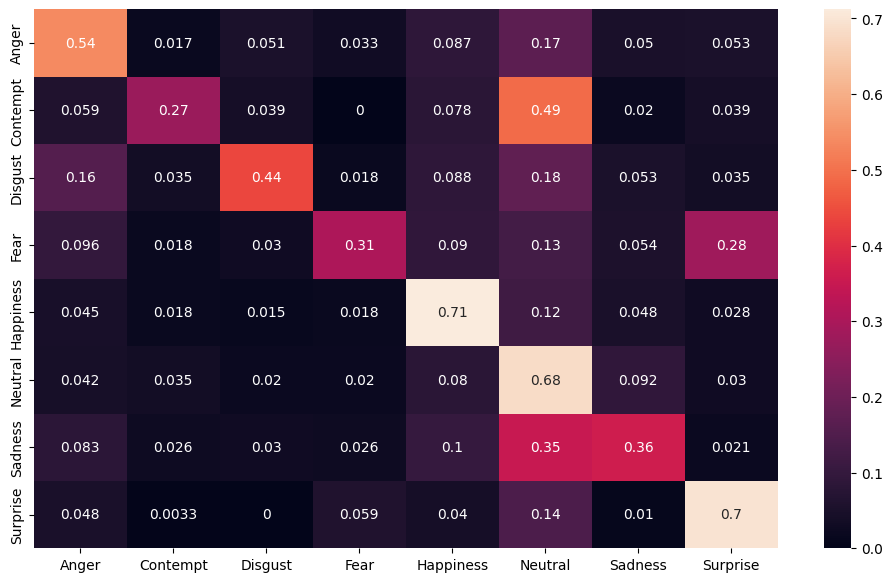

In [ ]:
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
print(precision_score(y_true, y_pred, average = "micro"))

0.6261445273982251


In [ ]:
print(precision_score(y_true, y_pred, average = "macro"))

0.44787474214343703


In [ ]:
print(recall_score(y_true, y_pred, average = "micro"))

0.6261445273982251


In [ ]:
print(recall_score(y_true, y_pred, average = "macro"))

0.5010841179514227


In [ ]:
train_d = pd.read_csv("data2/train.csv")

In [ ]:
train_d["emotion"].value_counts()

emotion
5.0    6000
4.0    5000
0.0    3519
3.0    3516
7.0    3205
6.0    3162
2.0    2907
1.0    2368
Name: count, dtype: int64